In [1]:
#################################################
# Dependencies
#################################################
from flask import Flask, jsonify, render_template, Response
from pymongo import MongoClient
from bson.json_util import dumps
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import pandas as pd
from io import BytesIO

In [2]:
def get_from_mongo():
    client = MongoClient(port=27017)
    db = client.project4
    comments = db.youtube
    return comments
query = {"category":"Music"}
fields = {
    "_id": 0,
    "processed_text": 1
}
result = get_from_mongo().find(query,fields)
list_cur = list(result)
df = pd.DataFrame(list_cur)
df.head()

,processed_text
0,Oooo
1,"This is punk, rock, punk-rock? i do not know....."
2,🍀 She had a face straight out a magazine God o...
3,Jisoo love you
4,So soothing 😍😍


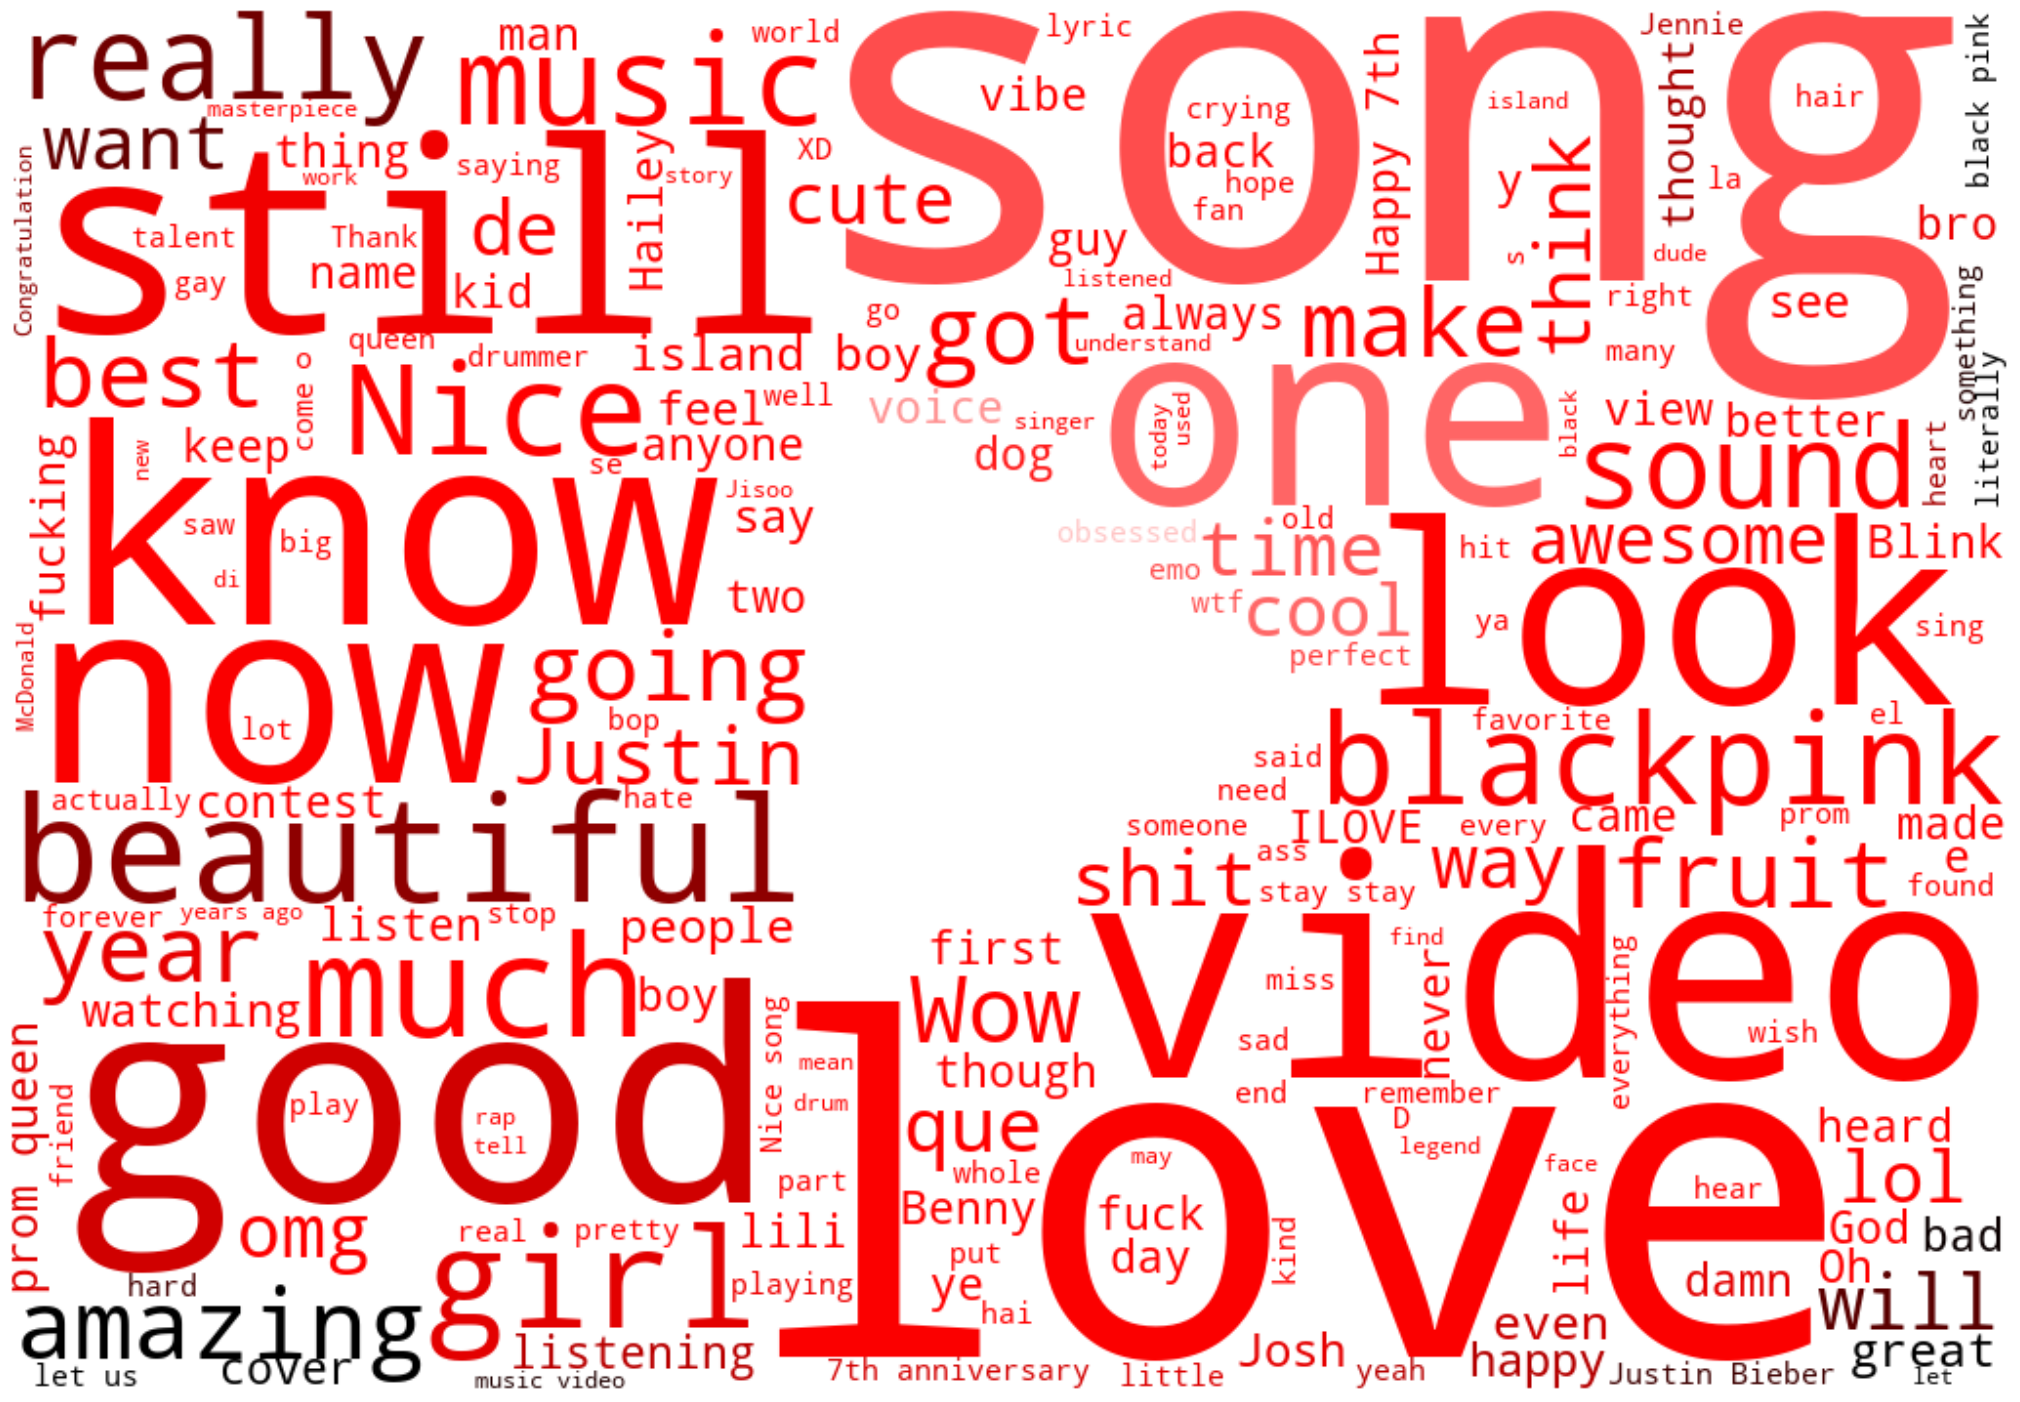

In [3]:
wordnet_lem = WordNetLemmatizer()

# Lemmatize processed text and join everything in a list
df['text_lem'] = df['processed_text'].apply(wordnet_lem.lemmatize)
all_words_lem = ' '.join([word for word in df['text_lem']])

# Generate a word cloud image
mask = np.array(Image.open("youtube.png"))
stopwords = set(STOPWORDS)

wordcloud_yt = WordCloud(height=708,
                            width=1024,
                            background_color="white",
                            mode="RGBA",
                            stopwords=stopwords,
                            mask=mask).generate(all_words_lem)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_yt.recolor(color_func=image_colors), interpolation="bilinear")
filename = plt.show()
filename

In [4]:
# df1 = pd.read_json("../final_data_for_machine_learning.json")
# df1.head()

In [5]:
# df1.to_csv("test.csv", index=False)
# df2 = pd.read_csv("test.csv")
# df2.head()

0

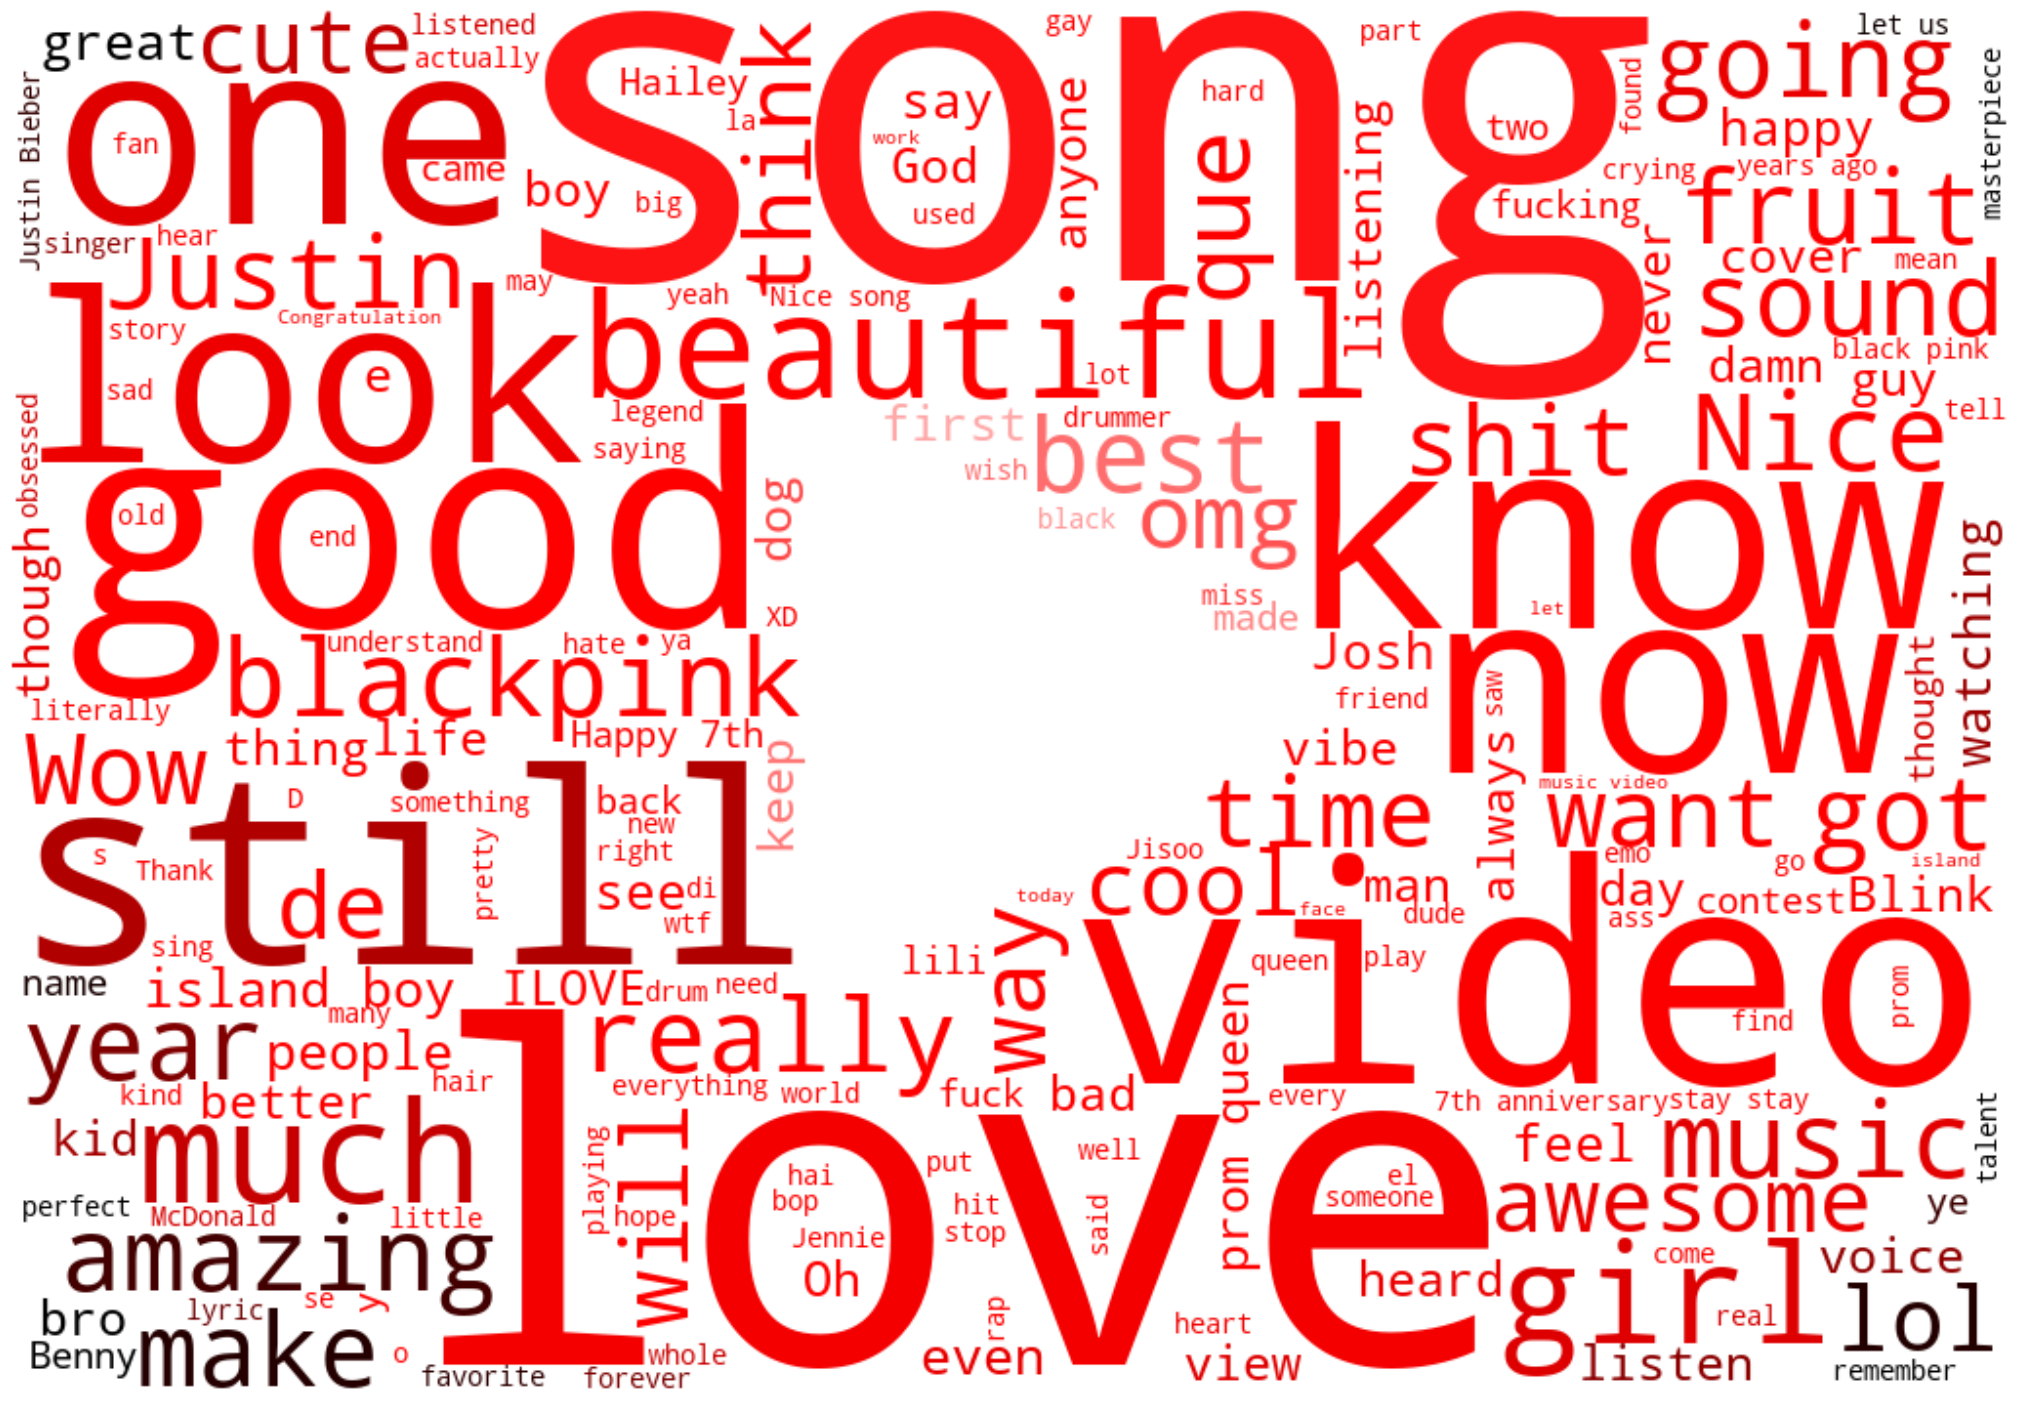

In [6]:
wordnet_lem = WordNetLemmatizer()

# Lemmatize processed text and join everything in a list
df['text_lem'] = df['processed_text'].apply(wordnet_lem.lemmatize)
all_words_lem = ' '.join([word for word in df['text_lem']])

# Generate a word cloud image
mask = np.array(Image.open("youtube.png"))
stopwords = set(STOPWORDS)

wordcloud_yt = WordCloud(height=708,
                            width=1024,
                            background_color="white",
                            mode="RGBA",
                            stopwords=stopwords,
                            mask=mask).generate(all_words_lem)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_yt.recolor(color_func=image_colors), interpolation="bilinear")

# Convert plot to PNG image
image_stream = BytesIO()
plt.savefig(image_stream, format="png")
image_stream.seek(0)

# Response(image_stream, mimetype="image/png")